# Normal Gravity of the Reference Ellipsoid

This code is based on the following User Guide of the ***Fatiando*** project:

[Gravity Disturbance | Harmonica](https://www.fatiando.org/harmonica/latest/user_guide/gravity_disturbance.html)

We can get the WGS84 ellipsoid defined in [boule](https://www.fatiando.org/boule/latest/index.html) and use the [boule.Ellipsoid.normal_gravity](https://www.fatiando.org/boule/latest/api/generated/boule.Ellipsoid.html#boule.Ellipsoid.normal_gravity) to compute the normal gravity (the gravity acceleration generated by the ellipsoid) on every observation point. This method implements the closed-form formula of [LiGotze2001](https://doi.org/10.1190/1.1487109), which calculates the normal gravity at any latitude and (geometric) height through an analytic solution [[Harmonica](https://www.fatiando.org/harmonica/latest/user_guide/gravity_disturbance.html)].

In [1]:
import boule as bl
import pygmt
import ensaio
import xarray as xr

In [2]:
fname = ensaio.fetch_earth_gravity(version=1)
gravity = xr.load_dataarray(fname)
ellipsoid = bl.WGS84
normal_gravity = ellipsoid.normal_gravity(gravity.latitude, gravity.height)

grdgradient [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


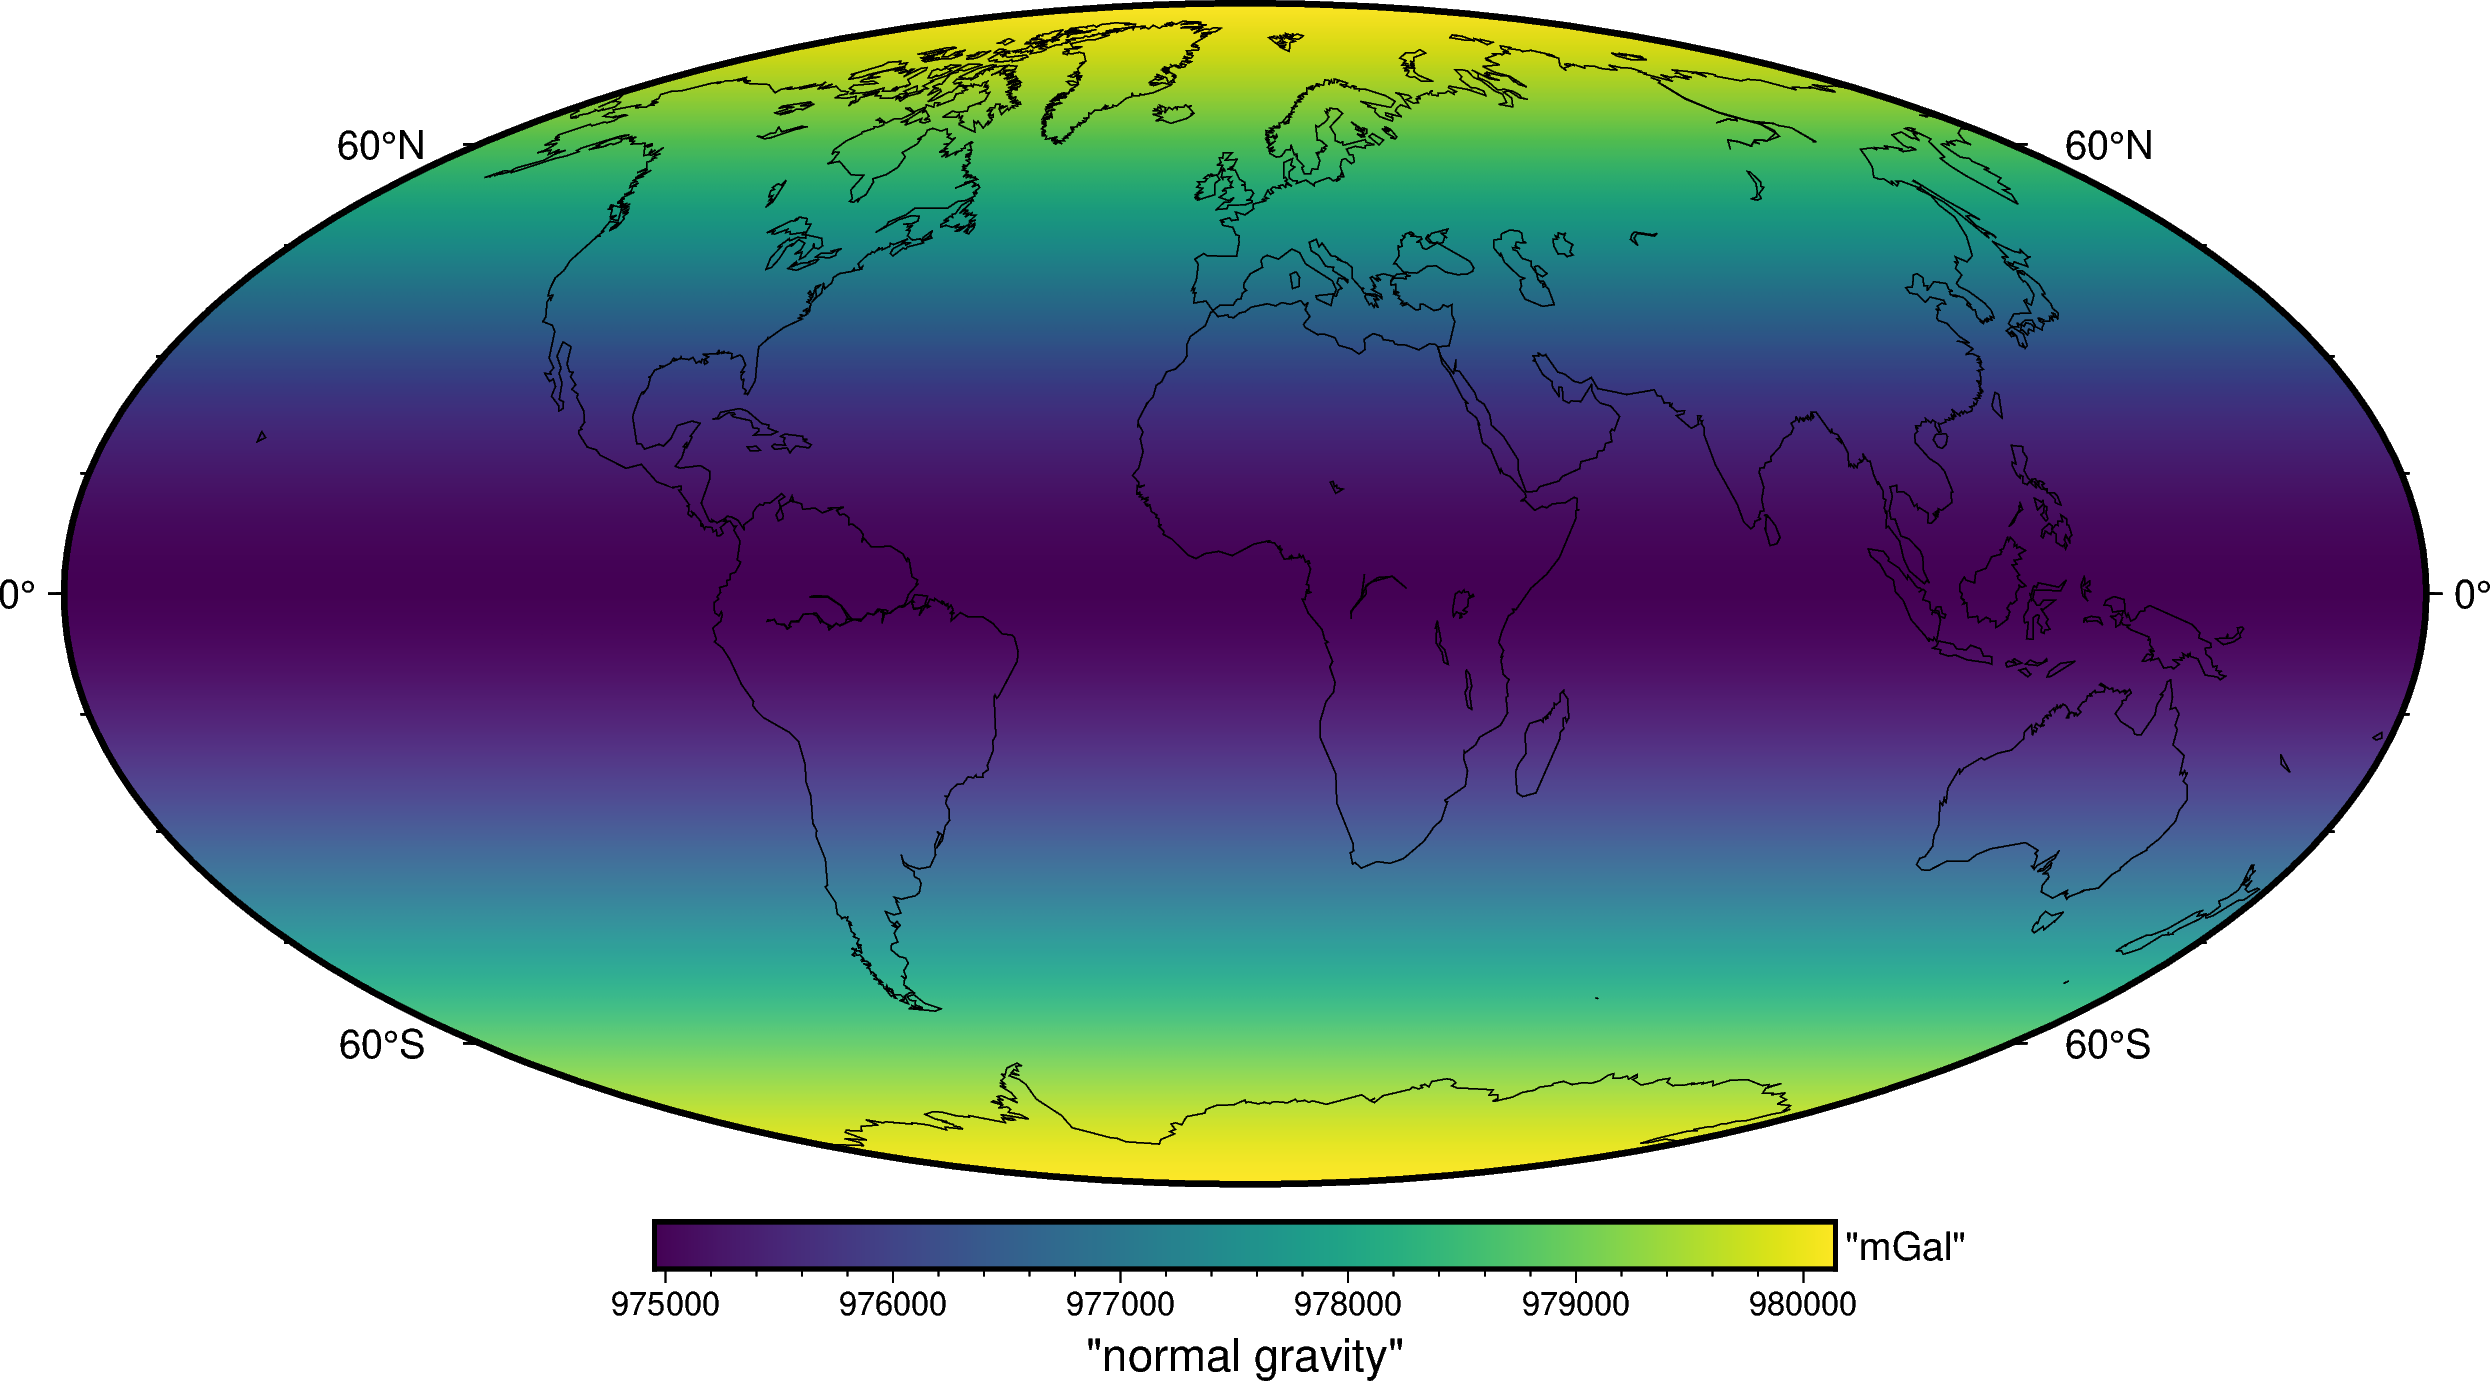

In [3]:
fig = pygmt.Figure()
fig.grdimage(
    normal_gravity,
    projection="W20c",
    cmap="viridis",
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c",
    frame=["af", 'y+l"mGal"', 'x+l"normal gravity"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.savefig("../output/figures/normal_gravity_ellipsoid.png")
fig.show()